In [ ]:
## Introduction

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

In this kernel we will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. Let's start!
Our Goals:
Understand the little distribution of the "little" data that was provided to us.
Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)
Determine the Classifiers we are going to use and decide which one has a higher accuracy.
Create a Neural Network and compare the accuracy to our best classifier.
Understand common mistaked made with imbalanced datasets.

Outline:
I. Understanding our data
a) Gather Sense of our data

II. Preprocessing
a) Scaling and Distributing
b) Splitting the Data


III. Random UnderSampling and Oversampling
a) Distributing and Correlating
b) Anomaly Detection
c) Dimensionality Reduction and Clustering (t-SNE)
d) Classifiers
e) A Deeper Look into Logistic Regression
f) Oversampling with SMOTE


IV. Testing 
a) Testing with Logistic Regression
b) Neural Networks Testing (Undersampling vs Oversampling)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

I. Gather Sense of Our Data:

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

Summary:

- The transaction amount is relatively small. 
- The mean of all the mounts made is approximately USD 88.
- There are no "Null" values, so we don't have to work on ways to replace values. Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

Feature Technicalities:

- **PCA Transformation:** The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
- **Scaling:** Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)


# 1. Load and Explore the Dataset

About the Dataset:
ererere

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

## 1.1 Loading the Data in Oracle

In [1]:
import os
import ssl
from six.moves import urllib

ssl._create_default_https_context = ssl._create_unverified_context
    
FILE_URL = "https://github.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/raw/master/creditcard.csv"
DIR_PATH = os.path.join("datasets", "creditcard")
FILE_PATH = os.path.join(DIR_PATH, "creditcard.csv")

def fetch_data(url=FILE_URL, dir_path=DIR_PATH, file_path=FILE_PATH):
    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)
    urllib.request.urlretrieve(url, file_path)
    return

In [2]:
fetch_data()

In [3]:
import pandas as pd

try:
    creditcard=pd.read_csv(FILE_PATH)
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Let's shuffle.. *tell why?)

In [24]:
creditcard=creditcard.sample(frac=1).reset_index(drop=True)

In [287]:
creditcard.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,79284.0,-0.476439,0.973928,1.663094,-0.094903,-0.140560,-0.693951,0.596386,0.081309,-0.631534,...,-0.164060,-0.465665,0.000306,0.509114,-0.258842,0.041877,0.259124,0.112581,5.34,0
1,58052.0,1.207099,-0.300112,-0.311003,0.164989,1.543265,4.058650,-1.140805,1.090853,0.761328,...,-0.115422,-0.279335,-0.040503,1.001063,0.573693,-0.393611,0.074648,0.031567,9.99,0
2,59570.0,0.769775,-0.583095,1.167355,1.631228,-1.301252,-0.385719,-0.295798,-0.003690,0.675138,...,0.262120,0.489147,-0.218436,0.737067,0.390314,-0.282965,0.031618,0.072822,199.00,0
3,41052.0,-5.755325,-4.558561,0.798001,1.235792,5.986081,-4.735026,-4.833077,-2.646901,1.043391,...,1.100864,-1.620624,-2.248671,0.651485,-1.091354,-0.048695,2.061368,-0.495984,10.99,0
4,40632.0,1.200556,-0.023438,0.668185,1.159110,-0.388135,0.187676,-0.369061,0.041869,0.761337,...,0.049852,0.378687,-0.263214,-0.397683,0.775584,-0.167262,0.059441,0.025381,24.56,0
5,147435.0,-0.529197,0.770453,-0.653286,-1.146514,1.744554,-1.321703,1.852077,-0.331520,-0.851388,...,0.419494,1.125579,-0.597892,-0.356770,0.846133,0.020992,0.017439,0.095091,25.44,0
6,26825.0,-0.822172,0.462946,1.610733,0.367516,0.702717,1.202951,1.118781,0.211590,-0.548454,...,0.260470,0.836581,0.085538,-0.655622,-0.060878,-0.271709,-0.042985,-0.123644,115.00,0
7,146567.0,-1.134651,2.191609,-0.422256,-0.075439,0.802893,-1.314916,0.734416,-0.666792,-0.865245,...,0.912853,0.155736,-0.533713,-0.159399,1.042906,0.109181,-0.026623,0.061973,1.00,0
8,145759.0,0.521135,0.998573,-0.805170,-0.125699,0.339711,-0.485663,-0.530283,-2.852968,-0.338432,...,-1.603369,-0.539913,0.257533,1.000945,0.435494,0.165260,-0.057689,0.132353,1.98,0
9,78038.0,-0.977145,1.737110,0.569641,0.930104,-0.422085,-0.854281,0.127148,0.603072,-1.054139,...,0.266435,0.554824,-0.077953,0.418284,-0.196156,-0.345631,-0.206234,0.037176,1.89,0


In [4]:
import oml
oml.connect("pyquser","pyquser",dsn='(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(service_name=oaa1)))')

oml.isconnected()

True

In [5]:
try:
    oml.drop(table="CREDITCARD")
except:
    pass

CC = oml.create(creditcard, table="CREDITCARD", oranumber=False)

### Exploring the Dataset

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

In [6]:
CC.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758217e-12,-8.247377e-13,-9.662670e-13,8.321981e-13,1.600333e-13,4.249311e-13,-3.047229e-13,8.673323e-14,-1.179896e-12,...,-3.406660e-13,-5.706109e-13,-9.725809e-13,1.464133e-12,-6.986193e-13,-5.614527e-13,3.332108e-12,-3.518880e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
CC.columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [ ]:
# Check if any fields are NULL????
df.isnull().sum().max() # Check for an equivalent.. perhaps desrcribe ()

The classes are heavily skewed we need to solve this issue later.

In [8]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(CC[(CC['Class'] == 0), 'Class'].count()/len(CC) * 100,2), '% of the dataset')
print('Frauds', round(CC[(CC['Class'] == 1), 'Class'].count()/len(CC) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

(array([284315,    492]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

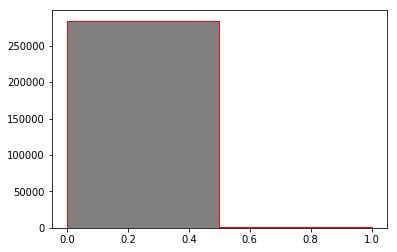

In [9]:
oml.graphics.hist(CC['Class'], bins=2, color='gray',
                  linestyle='solid', edgecolor='red')

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

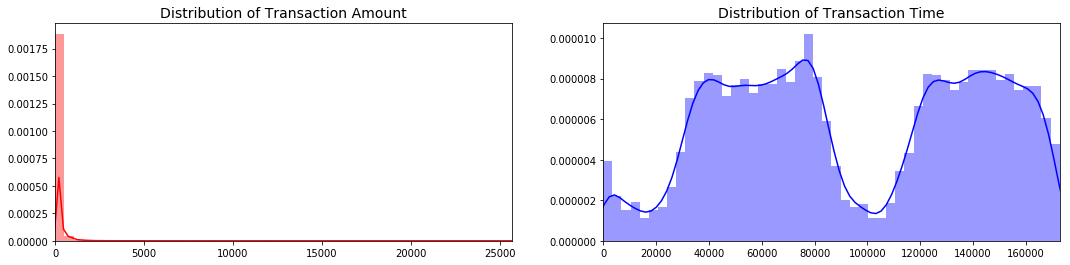

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot distribution of Transaction Amount
amount_val = CC['Amount'].pull()
sns.distplot(amount_val, ax=ax[0], color='r')

ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plot distribution of Transaction Amount
time_val = CC['Time'].pull()
sns.distplot(time_val, ax=ax[1], color='b')

ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# 2. Preparing the Dataset for ML

**Scaling and Distributing**

In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
What is a sub-Sample?
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
Why do we create a sub-Sample?
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.
Summary:
Scaled amount and scaled time are the columns with scaled values.
There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

Talk about Robust SCaler.. 

In [12]:
def scale_time_amount (dat):
    # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
    # Apply the Robust Scaling method: (x(i) - mean) / ((75% percentile) - (25% percentile))
    # dat[0] is 'Time' and dat[29] is 'Amount'

    import pandas as pd
    import numpy as np

    # Calculate the 25th & 75th percentiles and means of Time and Amount columns
    time_25_pct=np.percentile(dat[:,0], 25, axis=0)
    time_75_pct=np.percentile(dat[:,0], 75, axis=0)
    time_mean=np.mean(dat[:,0], axis=0)
    amount_25_pct=np.percentile(dat[:,29], 25, axis=0)
    amount_75_pct=np.percentile(dat[:,29], 75, axis=0)
    amount_mean=np.mean(dat[:,29], axis=0)
    
    dat[:,0] = (dat[:,0] - time_mean)/(time_75_pct - time_25_pct)
    dat[:,29] = (dat[:,29] - amount_mean)/(amount_75_pct - amount_25_pct)
    
    return(dat)

In [16]:
CC2=oml.table_apply(CC, func=scale_time_amount, func_value=CC)

In [18]:
CC2.head(3)

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.113898 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.113898  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.113886 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   

         V7        V8        V9  ...         V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...    0.247998  0.771679  0.909412   

        V24       V25       V26       V27       V28    Amount  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.856150    0.0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724 -1.196948    0.0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  4.056597    0.0  

[3 rows x 31 columns]

Equally Distributing and Correlating:
Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

**Correlation Matrices** Need some work.. 

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.
Summary and Explanation:
Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.
Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

In [289]:
corr = CC2.corr()

NameError: name 'corr2' is not defined

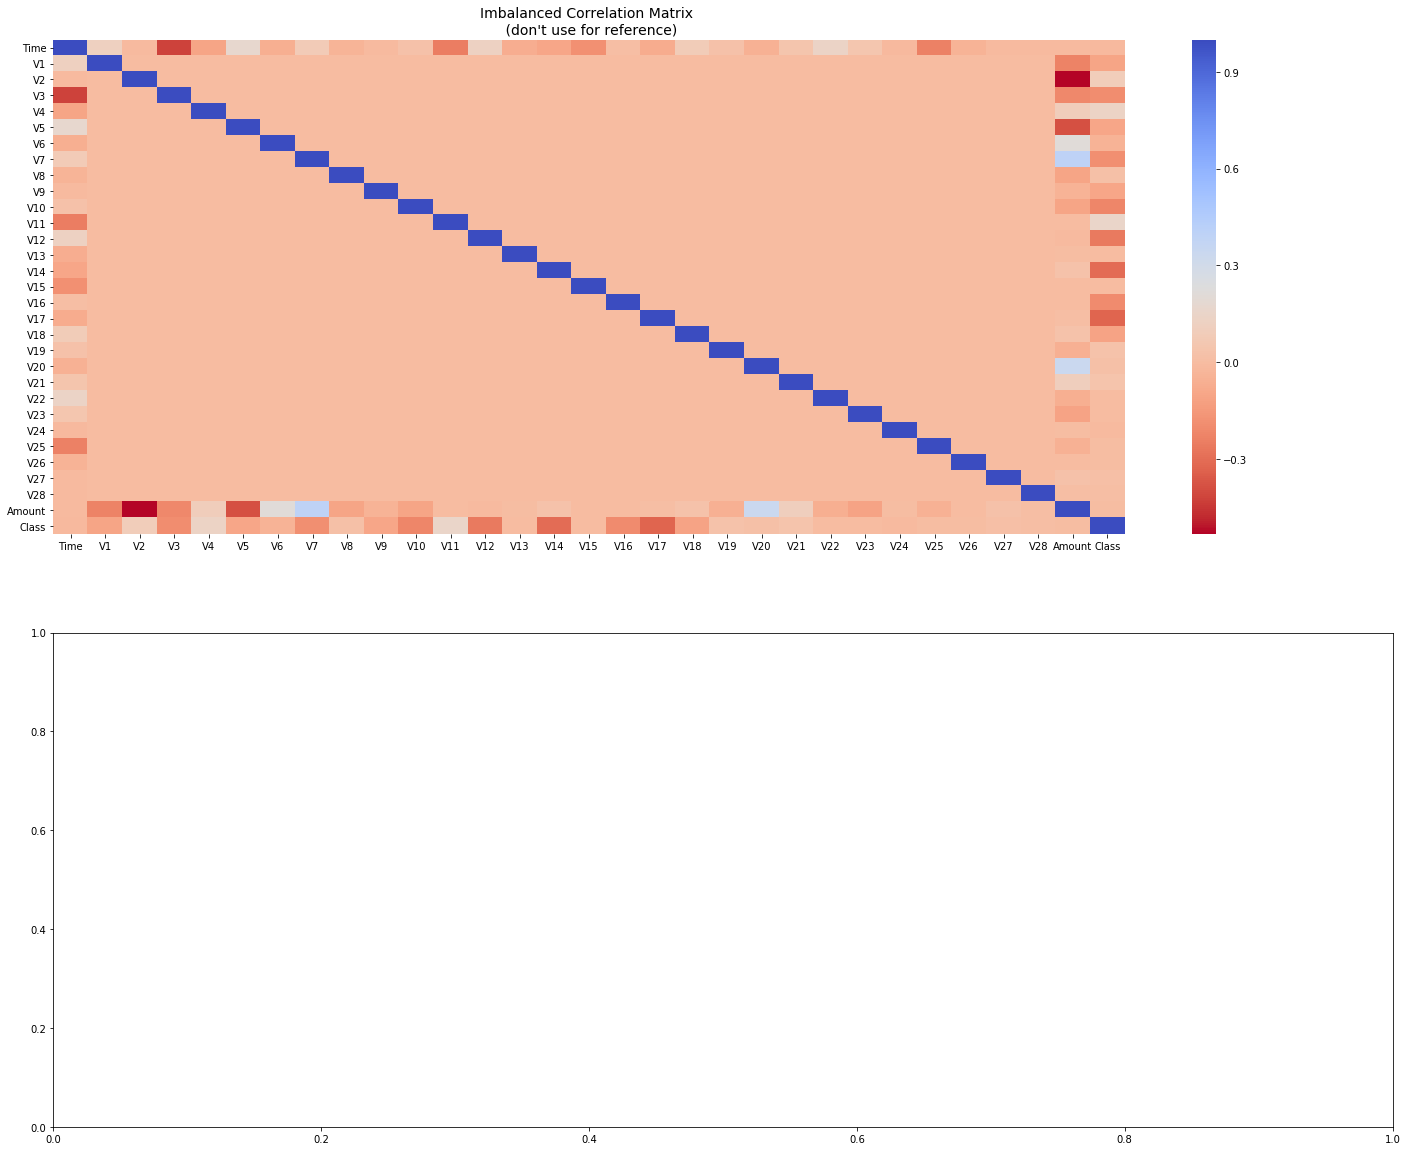

In [290]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sns.heatmap(corr2, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

oml.graphics.boxplot(new_CC[:, 'Class'], notch=True, showmeans = True)

plt.title('V17 vs Class Negative Correlation')
plt.ylabel('V17');
plt.xlabel('X->');

#f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
#sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
#axes[0].set_title('V17 vs Class Negative Correlation')

#sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
#axes[1].set_title('V14 vs Class Negative Correlation')


#sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
#axes[2].set_title('V12 vs Class Negative Correlation')


#sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
#axes[3].set_title('V10 vs Class Negative Correlation')

#plt.show()

### >> Anomaly Detection (Add this later)??

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models. 


Interquartile Range Method:
Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).
Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect. 


The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

Summary:
Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.
Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.
Note: After implementing outlier reduction our accuracy has been improved by over 3%! Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.

Reference: More information on Interquartile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless (Machine Learning Mastery blog)

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

## Create Test/Train Datases

**Splitting the Data (Original DataFrame)**

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [19]:
TRAIN, TEST = CC2.split(ratio = (.8, .2), strata_cols = "Class")

In [20]:
[split.shape for split in (TRAIN, TEST)]

[(227517, 31), (57290, 31)]

Random Under-Sampling:


In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.
Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [21]:
# First, get all fraud rows
TRAIN_SUB=TRAIN[TRAIN['Class'] == 1]

# Get the counts of fraud rows in this dataset
cnt=TRAIN_SUB[(TRAIN_SUB['Class'] == 1), 'Class'].count()

# Get an equal number of non-fraud rows as fraud rows (under-sampling)
NON_FRAUD=TRAIN[TRAIN['Class'] == 0].head(cnt)

# Append the fraud rows and non-fraud rows
TRAIN_SUB=TRAIN_SUB.append(NON_FRAUD)

In [22]:
TRAIN_SUB.shape

(790, 31)

Doing this for speeding up performance

In [44]:
R2=TRAIN_SUB.pull()
TRAIN_SUB=oml.push(R2)

R3=TRAIN.pull()
TRAIN=oml.push(R3)

R4=TEST.pull()
TEST=oml.push(R4)

Distribution of the Classes in the subsample dataset :

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


(array([395, 395]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

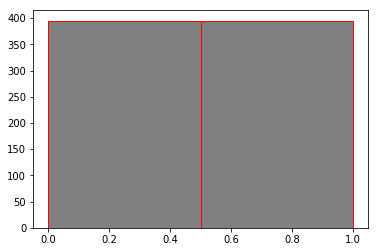

In [45]:
print('Distribution of the Classes in the subsample dataset :\n')
print('No Frauds', round(TRAIN_SUB[(TRAIN_SUB['Class'] == 0), 'Class'].count()/len(TRAIN_SUB) * 100,2), '% of the dataset')
print('Frauds', round(TRAIN_SUB[(TRAIN_SUB['Class'] == 1), 'Class'].count()/len(TRAIN_SUB) * 100,2), '% of the dataset')

oml.graphics.hist(TRAIN_SUB['Class'], bins=2, color='gray', linestyle='solid', edgecolor='red')

## Logistic Regression

In [25]:
def create_confusion_matrix (data, test_y):
    from sklearn.metrics import confusion_matrix
    
    return (confusion_matrix(test_y, data))

In [291]:
def get_classifier_performance (conf_matrix, print_ = False):
    import oml
    import numpy as np
    
    # Compute model performance stats: accuracy, precision, recall and specificity
    accuracy = round((conf_matrix[0][0]+conf_matrix[1][1])/np.sum(conf_matrix), 6)
    precision = round((conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1]), 6)
    recall = round((conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0]), 6)
    specificity = round((conf_matrix[1][1])/(conf_matrix[1][1]+conf_matrix[0][1]), 6)
    
    if (print_ == True):
        # Print model perf stats
        print ("Accuracy    =", accuracy)
        print ("Precision   =", precision)
        print ("Recall      =", recall)
        print ("Specificity =", specificity)

    return ([accuracy, precision, recall, specificity])

In [292]:
def do_predict (mod, test_x, test_y, print_ = False):
    # Predict on the training part of the fold
    pred_y = mod.predict(test_x)
    
    # Get the Confusion Matrix on test predictions
    ret = oml.table_apply(data=pred_y, func=create_confusion_matrix, test_y=test_y)
    conf_matrix = ret.pull()

    # Print the model performance stats from the Matrix
    metrics = get_classifier_performance(conf_matrix, print_)
    
    return (metrics)

In [293]:
def do_kfold_train (mod, training_set, print_ = False):

    # Get folds on the training_set
    if (print_ == True): print ("STEP 1: Creating Folds ...\n")
    folds = training_set.KFold(n_splits=5, strata_cols='Class')

    iter = 0; accuracy = 0; precision = 0; recall = 0; specificity = 0;
    # For each fold, fit the model and test
    for train, test in folds:
        if (print_ == True): print ("STEP", iter+2, ": Training with Fold ", iter+1, "...")
        # Fit the model with the training data.
        mod = mod.fit(train.drop('Class'), train['Class'])

        # Predict on the training part on this fold
        metrics = do_predict(mod, test.drop('Class'), test['Class'])
        
        accuracy = accuracy + metrics[0]
        precision = precision + metrics[1]
        recall = recall + metrics[2]
        specificity = specificity + metrics[3]
        
        iter=iter+1
        
    avg_accuracy = round(accuracy/iter, 4)
    avg_precision = round(precision/iter, 4)
    avg_recall = round(recall/iter, 4)
    avg_specificity = round(specificity/iter, 4)
    
    # Train the final model on the complete training set
    if (print_ == True): print ("\nSTEP", iter+2, ": Training the final model ...")
    mod = mod.fit(training_set.drop('Class'), training_set['Class'])
    
    if (print_ == True):
        # Print the Avg. Accuracy, Precision, Recall, Specificity
        print ("\n[Accuracy, Precision, Recall, Specificity] =",
               [avg_accuracy, avg_precision, avg_recall, avg_specificity])
        
    return (mod, [avg_accuracy, avg_precision, avg_recall, avg_specificity])

Talk about training with mutiple parameters and cehcking accuracy...

In [294]:
import pandas as pd
    
training_params = pd.DataFrame(columns=['svms_complexity_factor',
                                    'svms_regularizer', 'svms_solver', 'Accuracy', 'Precision',
                                    'Recall', 'Specificity', 'Score'])

for complexity in 'DEFAULT', '0.01', '0.1', '1', '10' :
    for regularizer in 'DEFAULT', '\'SVMS_REGULARIZER_L1\'', '\'SVMS_REGULARIZER_L2\'' :
        for solver in 'DEFAULT', '\'SVMS_SOLVER_SGD\'', '\'SVMS_SOLVER_IPM\'':
            temp_row = [(complexity, regularizer, solver, '', '', '', '', '')]
            temp_df = pd.DataFrame(temp_row, columns=['svms_complexity_factor',
                                    'svms_regularizer', 'svms_solver', 'Accuracy', 'Precision',
                                    'Recall', 'Specificity', 'Score'])
            training_params = training_params.append(temp_df, ignore_index = True)

In [295]:
training_params

,svms_complexity_factor,svms_regularizer,svms_solver,Accuracy,Precision,Recall,Specificity,Score
0,DEFAULT,DEFAULT,DEFAULT,,,,,
1,DEFAULT,DEFAULT,'SVMS_SOLVER_SGD',,,,,
2,DEFAULT,DEFAULT,'SVMS_SOLVER_IPM',,,,,
3,DEFAULT,'SVMS_REGULARIZER_L1',DEFAULT,,,,,
4,DEFAULT,'SVMS_REGULARIZER_L1','SVMS_SOLVER_SGD',,,,,
5,DEFAULT,'SVMS_REGULARIZER_L1','SVMS_SOLVER_IPM',,,,,
6,DEFAULT,'SVMS_REGULARIZER_L2',DEFAULT,,,,,
7,DEFAULT,'SVMS_REGULARIZER_L2','SVMS_SOLVER_SGD',,,,,
8,DEFAULT,'SVMS_REGULARIZER_L2','SVMS_SOLVER_IPM',,,,,
9,0.01,DEFAULT,DEFAULT,,,,,


In [305]:
def train_iterative (training_set, training_params):
    import pandas as pd
    global svm_mod
    
    all_cols = training_params.columns.values.tolist()
    metric_cols = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Score']
    non_metric_cols = list(set(all_cols) - set(metric_cols))
    
    for index_label, row_ in training_params.iterrows():
        string_ = ""
        for col_ in non_metric_cols:
            if training_params.at[index_label, col_] != 'DEFAULT':
                string_ = string_ + "," + col_ + "=" + training_params.at[index_label, col_]
        
        cmd = "global svm_mod; svm_mod = oml.svm(\'classification\', svms_kernel_function = \'dbms_data_mining.svms_linear\'" + string_ + ")"

        exec (cmd)
        svm_mod, metrics = do_kfold_train(svm_mod, training_set)
        score = (3*round(2*metrics[0]*metrics[2]/(metrics[0]+metrics[2]),4) + metrics[1]*2 + metrics[3])/6

        training_params.at[index_label, 'Accuracy'] = metrics[0]
        training_params.at[index_label, 'Precision'] = metrics[1]
        training_params.at[index_label, 'Recall'] = metrics[2]
        training_params.at[index_label, 'Specificity'] = metrics[3]
        training_params.at[index_label, 'Score'] = score

        print ("Iter", index_label, ":", metrics, ", Score :", score)

    best_training_params=training_params.loc[training_params['Score'].astype(float).idxmax()]
    return (best_params)

In [306]:
best_training_params = train_iterative(TRAIN_SUB, training_params)

Iter 0 : [0.985, 0.9893, 0.9812, 0.9901] , Score : 0.9863333333333334
Iter 1 : [0.9891, 1.0, 0.9794, 1.0] , Score : 0.9921000000000001
Iter 2 : [0.985, 0.9893, 0.9812, 0.9901] , Score : 0.9863333333333334
Iter 3 : [0.985, 0.9893, 0.9812, 0.9901] , Score : 0.9863333333333334
Iter 4 : [0.9723, 0.9574, 0.988, 0.9576] , Score : 0.9687833333333334
Iter 5 : [0.985, 0.9893, 0.9812, 0.9901] , Score : 0.9863333333333334
Iter 6 : [0.985, 0.9893, 0.9812, 0.9901] , Score : 0.9863333333333334
Iter 7 : [0.9891, 1.0, 0.9794, 1.0] , Score : 0.9921000000000001
Iter 8 : [0.985, 0.9893, 0.9812, 0.9901] , Score : 0.9863333333333334
Iter 9 : [0.9709, 0.9974, 0.949, 0.9975] , Score : 0.9786166666666668
Iter 10 : [0.88, 1.0, 0.8075, 1.0] , Score : 0.9211
Iter 11 : [0.9709, 0.9974, 0.949, 0.9975] , Score : 0.9786166666666668
Iter 12 : [0.9709, 0.9974, 0.949, 0.9975] , Score : 0.9786166666666668
Iter 13 : [0.8813, 1.0, 0.8091, 1.0] , Score : 0.9218500000000001
Iter 14 : [0.9709, 0.9974, 0.949, 0.9975] , Score 

Get the best parameters with top K1 Score

In [307]:
best_training_params

svms_complexity_factor              DEFAULT
svms_regularizer                    DEFAULT
svms_solver               'SVMS_SOLVER_SGD'
Accuracy                             0.9891
Precision                                 1
Recall                               0.9794
Specificity                               1
Score                                0.9921
Name: 1, dtype: object

In [ ]:
Train the full dataset with the paramenters 

In [310]:
svm_mod = oml.svm('classification', svms_kernel_function='SVMS_GAUSSIAN')

In [311]:
svm_mod = svm_mod.fit(TRAIN.drop('Class'), TRAIN['Class'])

In [312]:
metrics = do_predict(svm_mod, TEST.drop('Class'), TEST['Class'])

In [313]:
metrics

[0.999249, 0.999878, 0.999371, 0.897059]

In [ ]:
svm_mod, metrics = do_kfold_train(svm_mod, TRAIN)

In [ ]:
metrics

Let's train on Sub first and check accuracy

In [74]:
# Create an oml SVM model object with hyperparameter settings
svm_mod, metrics = do_kfold_train(svm_mod, TRAIN_SUB, print_ = True)

STEP 1: Creating Folds ...

STEP 2 : Training with Fold  1 ...
STEP 3 : Training with Fold  2 ...
STEP 4 : Training with Fold  3 ...
STEP 5 : Training with Fold  4 ...
STEP 6 : Training with Fold  5 ...

STEP 7 : Training the final model ...

[Average Accuracy, Average Precision, Average Recall, Average Specificity] = [0.9879, 0.9974, 0.9796, 0.9975]


In [70]:
metrics

[0.9879, 0.9974, 0.9796, 0.9975]

In [63]:
# Predict on Test Dataset
do_predict(svm_mod, TEST.drop('Class'), TEST['Class'], print_ = True)

Accuracy    = 0.99918
Precision   = 0.999895
Recall      = 0.999284
Specificity = 0.903226


[0.99918, 0.999895, 0.999284, 0.903226]

In [62]:
# Create an oml SVM model object with hyperparameter settings
svm_mod = do_kfold_train(svm_mod, TRAIN)


Printing Average scores across all folds:
Average Accuracy = 0.9992
Average Precision = 0.9998
Average Recall = 0.9994
Average Specificity = 0.8448


In [63]:
# Predict on Test Dataset
do_predict(svm_mod, TEST.drop('Class'), TEST['Class'], print_ = True)

Accuracy    = 0.99918
Precision   = 0.999895
Recall      = 0.999284
Specificity = 0.903226


[0.99918, 0.999895, 0.999284, 0.903226]

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

A Deeper Look into LogisticRegression:
In this section we will ive a deeper look into the logistic regression classifier.

Terms:
True Positives: Correctly Classified Fraud Transactions
False Positives: Incorrectly Classified Fraud Transactions
True Negative: Correctly Classified Non-Fraud Transactions
False Negative: Incorrectly Classified Non-Fraud Transactions
Precision: True Positives/(True Positives + False Positives)
Recall: True Positives/(True Positives + False Negatives)
Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.
Summary:
Precision starts to descend between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score.

In [ ]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

In [ ]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

SMOTE Technique (Over-Sampling):

<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800> SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". 


Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.
Cross Validation Overfitting Mistake:

Overfitting during Cross Validation:
In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. In the following section you will see amazing precision and recall scores but in reality our data is overfitting!

The Wrong Way:



As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: 

The Right Way:


As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

References:

DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION
SMOTE explained for noobs
Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [ ]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Test Data with Logistic Regression:
Confusion Matrix:
Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class. 


False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class. 


False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class 


True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

Summary:

Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.
Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):
In this section we will implement a simple Neural Network (with one hidden layer) in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions. 


Our Main Goal:

Our main goal is to explore how our simple neural network behaves in both the random undersample and oversample dataframes and see whether they can predict accuractely both non-fraud and fraud cases. Why not only focus on fraud? Imagine you were a cardholder and after you purchased an item your card gets blocked because the bank's algorithm thought your purchase was a fraud. That's why we shouldn't emphasize only in detecting fraud cases but we should also emphasize correctly categorizing non-fraud transactions.

The Confusion Matrix:

Here is again, how the confusion matrix works:

Upper Left Square: The amount of correctly classified by our model of no fraud transactions.
Upper Right Square: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .
Lower Left Square: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .
Lower Right Square: The amount of correctly classified by our model of fraud transactions.
Summary (Keras || Random UnderSampling):

Dataset: In this final phase of testing we will fit this model in both the random undersampled subset and oversampled dataset (SMOTE) in order to predict the final result using the original dataframe testing data.
Neural Network Structure: As stated previously, this will be a simple model composed of one input layer (where the number of nodes equals the number of features) plus bias node, one hidden layer with 32 nodes and one output node composed of two possible results 0 or 1 (No fraud or fraud).
Other characteristics: The learning rate will be 0.001, the optimizer we will use is the AdamOptimizer, the activation function that is used in this scenario is "Relu" and for the final outputs we will use sparse categorical cross entropy, which gives the probability whether an instance case is no fraud or fraud (The prediction will pick the highest probability between the two.)

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])